### DSC 670 - Project Milestone 3
### AI Consumer Finance Chatbot
### Christopher Stemm
### 2/9/2025

## Introduction

**In the first two milestones, I proposed a fine-tuning solution using a cleaned version of the Finance-alpaca dataset, and experimented with gpt-40-mini finding it to be ideal for the chatbot based on performance and cost. For this milestone, I build a fine-tuned model and examine the results.**

## Data Wrangling

**I have 44,341 input/output pairs for training and that is a lot of tokens! Looking at the distribution of token lengths on Huggingface, there are some very long prompts and responses in the training data. This is low hanging fruit for filtering since the project since we would not expect very lengthy questions and the desired output is a pithy style. The chatbot is to be a marketing novelty albeit an impressive and helpful one. I will take a look at the longest token length rows in the dataframe to see what is going on.**

In [8]:
!pip install huggingface_hub
import pandas as pd
from openai import OpenAI
import os
from dotenv import load_dotenv

df = pd.read_json("hf://datasets/gbharti/wealth-alpaca_lora/final_dataset_clean.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44341 entries, 0 to 44340
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  44341 non-null  object
 1   input        44341 non-null  object
 2   output       44341 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


**No null entries so I will concatenate all of the columns for each row and count tokens.**

In [13]:
# Initialize the OpenAI client with key stored as an environment variable.
client = OpenAI()

# Function to count tokens using OpenAI's tokenizer.
def count_tokens(text):
    response = client.Completion.create(
        engine="gpt-4o-mini-2024-07-18",
        prompt=text,
        max_tokens=1
    )
    return len(response['choices'][0]['text'].split())

df['totaltext'] = df['instruction'].str.cat(df['input'], sep=' ').str.cat(df['output'], sep=' ')
# Adjust display options
pd.set_option('display.max_colwidth', None)
df.head(2)

,instruction,input,output,totaltext
0,"For a car, what scams can be plotted with 0% financing vs rebate?",,"The car deal makes money 3 ways. If you pay in one lump payment. If the payment is greater than what they paid for the car, plus their expenses, they make a profit. They loan you the money. You make payments over months or years, if the total amount you pay is greater than what they paid for the car, plus their expenses, plus their finance expenses they make money. Of course the money takes years to come in, or they sell your loan to another business to get the money faster but in a smaller amount. You trade in a car and they sell it at a profit. Of course that new transaction could be a lump sum or a loan on the used car... They or course make money if you bring the car back for maintenance, or you buy lots of expensive dealer options. Some dealers wave two deals in front of you: get a 0% interest loan. These tend to be shorter 12 months vs 36,48,60 or even 72 months. The shorter length makes it harder for many to afford. If you can't swing the 12 large payments they offer you at x% loan for y years that keeps the payments in your budget. pay cash and get a rebate. If you take the rebate you can't get the 0% loan. If you take the 0% loan you can't get the rebate. The price you negotiate minus the rebate is enough to make a profit. The key is not letting them know which offer you are interested in. Don't even mention a trade in until the price of the new car has been finalized. Otherwise they will adjust the price, rebate, interest rate, length of loan, and trade-in value to maximize their profit. The suggestion of running the numbers through a spreadsheet is a good one. If you get a loan for 2% from your bank/credit union for 3 years and the rebate from the dealer, it will cost less in total than the 0% loan from the dealer. The key is to get the loan approved by the bank/credit union before meeting with the dealer. The money from the bank looks like cash to the dealer.","For a car, what scams can be plotted with 0% financing vs rebate? The car deal makes money 3 ways. If you pay in one lump payment. If the payment is greater than what they paid for the car, plus their expenses, they make a profit. They loan you the money. You make payments over months or years, if the total amount you pay is greater than what they paid for the car, plus their expenses, plus their finance expenses they make money. Of course the money takes years to come in, or they sell your loan to another business to get the money faster but in a smaller amount. You trade in a car and they sell it at a profit. Of course that new transaction could be a lump sum or a loan on the used car... They or course make money if you bring the car back for maintenance, or you buy lots of expensive dealer options. Some dealers wave two deals in front of you: get a 0% interest loan. These tend to be shorter 12 months vs 36,48,60 or even 72 months. The shorter length makes it harder for many to afford. If you can't swing the 12 large payments they offer you at x% loan for y years that keeps the payments in your budget. pay cash and get a rebate. If you take the rebate you can't get the 0% loan. If you take the 0% loan you can't get the rebate. The price you negotiate minus the rebate is enough to make a profit. The key is not letting them know which offer you are interested in. Don't even mention a trade in until the price of the new car has been finalized. Otherwise they will adjust the price, rebate, interest rate, length of loan, and trade-in value to maximize their profit. The suggestion of running the numbers through a spreadsheet is a good one. If you get a loan for 2% from your bank/credit union for 3 years and the rebate from the dealer, it will cost less in total than the 0% loan from the dealer. The key is to get the loan approved by the bank/credit union before meeting with the dealer. The money from the bank looks like cash to the dealer."
1,Why does it m

In [27]:
import tiktoken


def count_tokens(string: str, encoding_name='o200k_base') -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

# Add a token count column
df['token_count'] = df['totaltext'].apply(count_tokens)

df.head(2)

,instruction,input,output,totaltext,token_count
0,"For a car, what scams can be plotted with 0% financing vs rebate?",,"The car deal makes money 3 ways. If you pay in one lump payment. If the payment is greater than what they paid for the car, plus their expenses, they make a profit. They loan you the money. You make payments over months or years, if the total amount you pay is greater than what they paid for the car, plus their expenses, plus their finance expenses they make money. Of course the money takes years to come in, or they sell your loan to another business to get the money faster but in a smaller amount. You trade in a car and they sell it at a profit. Of course that new transaction could be a lump sum or a loan on the used car... They or course make money if you bring the car back for maintenance, or you buy lots of expensive dealer options. Some dealers wave two deals in front of you: get a 0% interest loan. These tend to be shorter 12 months vs 36,48,60 or even 72 months. The shorter length makes it harder for many to afford. If you can't swing the 12 large payments they offer you at x% loan for y years that keeps the payments in your budget. pay cash and get a rebate. If you take the rebate you can't get the 0% loan. If you take the 0% loan you can't get the rebate. The price you negotiate minus the rebate is enough to make a profit. The key is not letting them know which offer you are interested in. Don't even mention a trade in until the price of the new car has been finalized. Otherwise they will adjust the price, rebate, interest rate, length of loan, and trade-in value to maximize their profit. The suggestion of running the numbers through a spreadsheet is a good one. If you get a loan for 2% from your bank/credit union for 3 years and the rebate from the dealer, it will cost less in total than the 0% loan from the dealer. The key is to get the loan approved by the bank/credit union before meeting with the dealer. The money from the bank looks like cash to the dealer.","For a car, what scams can be plotted with 0% financing vs rebate? The car deal makes money 3 ways. If you pay in one lump payment. If the payment is greater than what they paid for the car, plus their expenses, they make a profit. They loan you the money. You make payments over months or years, if the total amount you pay is greater than what they paid for the car, plus their expenses, plus their finance expenses they make money. Of course the money takes years to come in, or they sell your loan to another business to get the money faster but in a smaller amount. You trade in a car and they sell it at a profit. Of course that new transaction could be a lump sum or a loan on the used car... They or course make money if you bring the car back for maintenance, or you buy lots of expensive dealer options. Some dealers wave two deals in front of you: get a 0% interest loan. These tend to be shorter 12 months vs 36,48,60 or even 72 months. The shorter length makes it harder for many to afford. If you can't swing the 12 large payments they offer you at x% loan for y years that keeps the payments in your budget. pay cash and get a rebate. If you take the rebate you can't get the 0% loan. If you take the 0% loan you can't get the rebate. The price you negotiate minus the rebate is enough to make a profit. The key is not letting them know which offer you are interested in. Don't even mention a trade in until the price of the new car has been finalized. Otherwise they will adjust the price, rebate, interest rate, length of loan, and trade-in value to maximize their profit. The suggestion of running the numbers through a spreadsheet is a good one. If you get a loan for 2% from your bank/credit union for 3 years and the rebate from the dealer, it will cost less in total than the 0% loan from the dealer. The key is to get the loan approved by the bank/credit union before meeting with the dealer. The money from the bank looks like cash to the dealer.",453

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44341 entries, 0 to 44340
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  44341 non-null  object
 1   input        44341 non-null  object
 2   output       44341 non-null  object
 3   totaltext    44341 non-null  object
 4   token_count  44341 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [33]:
# Filter rows with long token counts.
df1 = df.drop('totaltext', axis=1)
long_token_df = df1.nlargest(3, 'token_count')

# Display the filtered DataFrame
print(long_token_df)

                                                                                             instruction  \
10110  How can I pay for school to finish my degree when I can't get a student loan and have bad credit?   
6411                                              What happens to people without any retirement savings?   
16034                                Why do 10 year Treasury bond yields affect mortgage interest rates?   

      input  \
10110         
6411          
16034         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

**Nope. The long-winded outputs are the problem with these although the answers are thoughtful and entertaining. The questions are great but output format is too long. we'll do a histogram of token count to find a good cutoff for filtering.**

<Axes: >

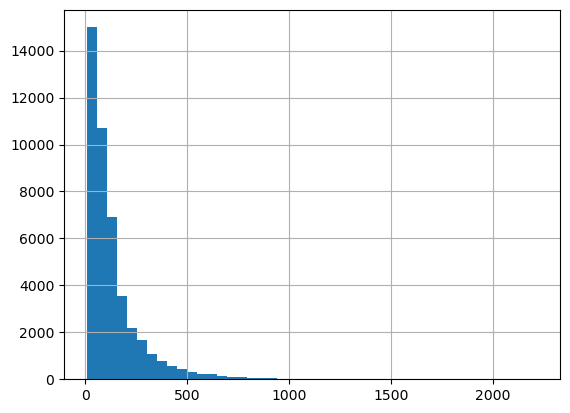

In [104]:
import matplotlib.pyplot as plt

# Dropping top three token counts.
df1 = df1[df1['token_count'] < 2417]
df1.token_count.hist(bins = 45)

**I will drop all rows with a token count over 250.**

In [218]:
df2 = df1[df1['token_count'] <= 250].reset_index(drop=True)

In [220]:
# Calculate the total of column 'token_count'
num_train_tokens = df2['token_count'].sum()

print(f"The total numer of tokens is: {num_train_tokens}")

The total numer of tokens is: 3341503


In [328]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38275 entries, 0 to 38274
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  38275 non-null  object
 1   input        38275 non-null  object
 2   output       38275 non-null  object
 3   token_count  38275 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


**3.3 million tokens is too many for my budget at $3/million/epoch. I will sample and keep 15% of the rows.**

In [384]:
df3 = df2.sample(frac=0.15).reset_index(drop=True)

In [386]:
# Calculate the total of column 'token_count'
num_train_tokens = df3['token_count'].sum()

print(f"The total numer of tokens is: {num_train_tokens}")

The total numer of tokens is: 496824


In [388]:
df4 = df3.drop('token_count', axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  5741 non-null   object
 1   input        5741 non-null   object
 2   output       5741 non-null   object
dtypes: object(3)
memory usage: 134.7+ KB


**Now there 5741 prompt/output pairs totaling about a half million tokens. I will sample 5 rows to examine structure.**


In [391]:
df4_sample = df4.sample(5)
print(df4_sample.iloc[0])
print(df4_sample.iloc[1])
print(df4_sample.iloc[2])
print(df4_sample.iloc[3])
print(df4_sample.iloc[4])

instruction                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     What is the farthest someone would likely be stopped out from their stop loss without setting a stop limit?
input                                                       

In [393]:
# Count non-blank strings in 'input'
non_blank_count = df4['input'].str.strip().replace('', None).dropna().count()

print(f"Number of non-blank strings: {non_blank_count}")

Number of non-blank strings: 1700


**Since 1700 prompts have context in addition to instructions, I will separate the context by adding ### to the input row. I will also do some string manipulation to prepare the data for OpenAI fine-tuning**

In [396]:
# Add characters to each string in the column 'input'
df4['input'] = df4['input'].apply(lambda x: '''  ### ''' + x + '''"},''')

# Add characters to each string in the column 'instruction'
df4['instruction'] = df4['instruction'].apply(lambda x: '''{"messages": [{"role": "system", "content": " You are a helpful assistant"}, {"role": "user", "content": "''' + x)

# Add characters to each string in the column 'output'
df4['output'] = df4['output'].apply(lambda x: ''' {"role": "assistant", "content": "''' + x + '''"}]}''')

df4['jline'] = df4['instruction'].str.cat(df4['input'], sep='').str.cat(df4['output'], sep='')

df4['jline'].head(2)

0    {"messages": [{"role": "system", "content": " You are a helpful assistant"}, {"role": "user", "content": "Come up with a story in the form of a metaphor that explains the concept of intelligence.  ### "}, {"role": "assistant", "content": "Intelligence is like a race. Everyone starts at the same starting line, but each person has different abilities and obstacles along the way. Some people catch up quickly, while others take their time. The only way to make it to the finish line is to persistently apply effort and develop strategies that best utilize one's skills and resources. No matter how quickly one reaches the finish line, it's still possible to achieve great things. It's not the speed that matters, it's the journey and the lessons one takes away from it."}]}
1                                                                                                                                              {"messages": [{"role": "system", "content": " You are a helpful assistant"}, {

In [398]:
df4.head(2)

,instruction,input,output,jline
0,"{""messages"": [{""role"": ""system"", ""content"": "" You are a helpful assistant""}, {""role"": ""user"", ""content"": ""Come up with a story in the form of a metaphor that explains the concept of intelligence.","### ""},","{""role"": ""assistant"", ""content"": ""Intelligence is like a race. Everyone starts at the same starting line, but each person has different abilities and obstacles along the way. Some people catch up quickly, while others take their time. The only way to make it to the finish line is to persistently apply effort and develop strategies that best utilize one's skills and resources. No matter how quickly one reaches the finish line, it's still possible to achieve great things. It's not the speed that matters, it's the journey and the lessons one takes away from it.""}]}","{""messages"": [{""role"": ""system"", ""content"": "" You are a helpful assistant""}, {""role"": ""user"", ""content"": ""Come up with a story in the form of a metaphor that explains the concept of intelligence. ### ""}, {""role"": ""assistant"", ""content"": ""Intelligence is like a race. Everyone starts at the same starting line, but each person has different abilities and obstacles along the way. Some people catch up quickly, while others take their time. The only way to make it to the finish line is to persistently apply effort and develop strategies that best utilize one's skills and resources. No matter how quickly one reaches the finish line, it's still possible to achieve great things. It's not the speed that matters, it's the journey and the lessons one takes away from it.""}]}"
1,"{""messages"": [{""role"": ""system"", ""content"": "" You are a helpful assistant""}, {""role"": ""user"", ""content"": ""Generate a persuasive argument for using renewable sources of energy.","### ""},","{""role"": ""assistant"", ""content"": ""Using renewable sources of energy is essential for the future of our planet. Renewable sources of energy are much cleaner and more sustainable than non-renewable sources, and can help reduce greenhouse gas emissions and slow the effects of climate change. Renewable energy sources are also usually cheaper in the long run and can create more jobs than non-renewable sources, providing a boost to local economies.""}]}","{""messages"": [{""role"": ""system"", ""content"": "" You are a helpful assistant""}, {""role"": ""user"", ""content"": ""Generate a persuasive argument for using renewable sources of energy. ### ""}, {""role"": ""assistant"", ""content"": ""Using renewable sources of energy is essential for the future of our planet. Renewable sources of energy are much cleaner and more sustainable than non-renewable sources, and can help reduce greenhouse gas emissions and slow the effects of climate change. Renewable energy sources are also usually cheaper in the long run and can create more jobs than non-renewable sources, providing a boost to local economies.""}]}"


**The strings concatenated correctly and now I have a pandas series of jsons. I will convert the series to a list, shuffle, and split into a training and validation set.**

**But first, I will check if the chat completions in the dataframe are valid json and filter those that are not.**

In [402]:
df5 = df4.drop(columns=['instruction', 'input', 'output'])
# Function to check if a string is valid JSON
def is_valid_json(s):
    try:
        json.loads(s)
        return True
    except ValueError:
        return False

# Apply the function and filter the DataFrame
df5['is_valid'] = df5['jline'].apply(is_valid_json)
df5_valid_json = df5[df5['is_valid']].drop(columns=['is_valid']).reset_index(drop=True)

df5_valid_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   jline   4061 non-null   object
dtypes: object(1)
memory usage: 31.9+ KB


In [469]:
import json
import random
import math


df5_valid_json['jline'].apply(json.loads, strict=False)
jlines = df5_valid_json['jline'].tolist()

random.shuffle(jlines)
# 90/10 train/test split
training_line_cutoff = math.ceil(len(jlines) * (0.9))
train = jlines[:training_line_cutoff]
valid = jlines[training_line_cutoff:]

print(len(train))
print(len(valid))
print(len(jlines))
print(train[0])
print(valid[0])

3655
406
4061
{"messages": [{"role": "system", "content": " You are a helpful assistant"}, {"role": "user", "content": "What is the correct way to report incentive stock options (ISO) on federal taxes?  ### "}, {"role": "assistant", "content": "I'm assuming this was a cashless exercise because you had income show up on your w-2. When I had a similar situation, I did the following: If you made $50,000 in salary and $10,000 in stock options then your W-2 now says $60,000. You'll record that on your taxes just like it was regular income.  You'll also get a form that talks about your stock sale.   But remember, you bought and sold the stock within seconds.  Your forms will probably look like this: Bought stock: $10,000 Sold stock: $10,000 + $50 commission Total profit (loss): ($50) From the Turbotax/IRS view point, you lost $50 on the sale of the stock because you paid the commission, but the buy and sell prices were identical or nearly identical."}]}
{"messages": [{"role": "system", "cont

**Again, the format looks right. I will now load the training and validation chat jsons into json lines files.**

In [475]:
# Writing training list of JSON objects to a JSON Lines file
with open('finance_training_data.jsonl', 'w', encoding="utf-8") as file:
    for entry in train:
        file.write(entry + '\n')

# Writing validation list of JSON objects to a JSON Lines file
with open('finance_validation_data.jsonl', 'w', encoding="utf-8") as file:
    for entry in valid:
        file.write(entry + '\n')

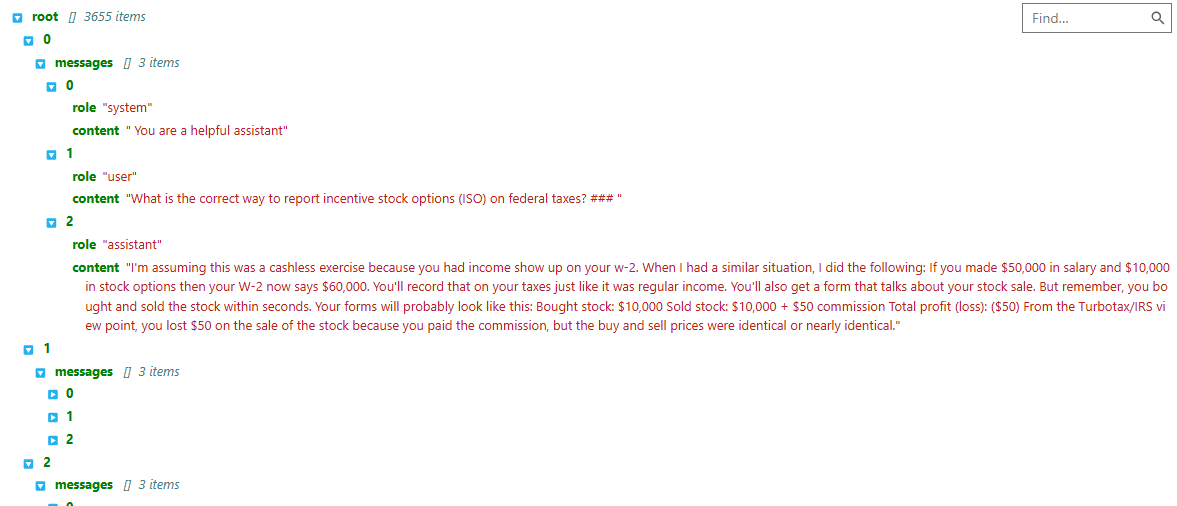

**The json lines files look good after some experimentation to remove outer quotation marks from the lines of json. The next step is to create training and validation data file at OpenAI for fine-tuning.**

In [478]:
def upload_training_file(file_path):
    """Upload training file to OpenAI"""
    with open(file_path, "rb") as file:
        response = client.files.create(
            file=file,
            purpose="fine-tune"
        )
        return response.id

# Upload both training and validation files.
training_file_id = upload_training_file("finance_training_data.jsonl")
validation_file_id = upload_training_file("finance_validation_data.jsonl")

In [480]:
from time import sleep

def create_fine_tuning_job(training_file_id, validation_file_id=None, model="gpt-4o-mini-2024-07-18", suffix=None):
    """Create a fine-tuning job"""
    response = client.fine_tuning.jobs.create(
        training_file=training_file_id,
        validation_file=validation_file_id,
        model=model,
        suffix=suffix
    )
    return response.id

# Start the fine-tuning job
model = "gpt-4o-mini-2024-07-18"
suffix="finance"
job_id = create_fine_tuning_job(training_file_id, validation_file_id, model, suffix)

def monitor_job(job_id):
    """Monitor fine-tuning job progress"""
    while True:
        job = client.fine_tuning.jobs.retrieve(job_id)
        print(f"Status: {job.status}")

        if job.status in ["succeeded", "failed"]:
            return job

        # List latest events
        events = client.fine_tuning.jobs.list_events(
            fine_tuning_job_id=job_id,
            limit=8
        )
        for event in events.data:
            print(f"Event: {event.message}")

        sleep(60)  # Check every minute.

# Monitor the job until completion
job = monitor_job(job_id)
if job.status == "succeeded":
    fine_tuned_model = job.fine_tuned_model
    print(f"Fine-tuned model ID: {fine_tuned_model}")
else:
    print("Fine-tuning failed.")

Status: validating_files
Event: Validating training file: file-Hhh5PmwfaqVKAeJ4aqHw5p and validation file: file-9PExfoL7WKiotX8RiHUJSs
Event: Created fine-tuning job: ftjob-12ei20Pry0Q9gOgDxYWhXszl
Status: validating_files
Event: Validating training file: file-Hhh5PmwfaqVKAeJ4aqHw5p and validation file: file-9PExfoL7WKiotX8RiHUJSs
Event: Created fine-tuning job: ftjob-12ei20Pry0Q9gOgDxYWhXszl
Status: validating_files
Event: Validating training file: file-Hhh5PmwfaqVKAeJ4aqHw5p and validation file: file-9PExfoL7WKiotX8RiHUJSs
Event: Created fine-tuning job: ftjob-12ei20Pry0Q9gOgDxYWhXszl
Status: running
Event: Fine-tuning job started
Event: Files validated, moving job to queued state
Event: Validating training file: file-Hhh5PmwfaqVKAeJ4aqHw5p and validation file: file-9PExfoL7WKiotX8RiHUJSs
Event: Created fine-tuning job: ftjob-12ei20Pry0Q9gOgDxYWhXszl
Status: running
Event: Fine-tuning job started
Event: Files validated, moving job to queued state
Event: Validating training file: file

In [482]:
client.fine_tuning.jobs.retrieve(job_id)

FineTuningJob(id='ftjob-12ei20Pry0Q9gOgDxYWhXszl', created_at=1739131819, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:personal:finance:Az8PLsfl', finished_at=1739133689, hyperparameters=Hyperparameters(batch_size=7, learning_rate_multiplier=1.8, n_epochs=3), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-pkgoTNwXsJPUTZ1ay0fzrCJp', result_files=['file-APZa9chVSXGFt28rHoJQjr'], seed=630237838, status='succeeded', trained_tokens=1121643, training_file='file-Hhh5PmwfaqVKAeJ4aqHw5p', validation_file='file-9PExfoL7WKiotX8RiHUJSs', estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=7, learning_rate_multiplier=1.8, n_epochs=3)), type='supervised'), user_provided_suffix='finance')

**The auto hyperparameter settings chosen by OpenAI were n_epochs = 3, learning_rate_multiplier=1.8, and batch_size=7.**

In [485]:
import base64
fine_tune_results = client.fine_tuning.jobs.retrieve(job.id).result_files
result_file = client.files.retrieve(fine_tune_results[0])
content = client.files.content(result_file.id)
with open("fine_tune_results_finance_model1.csv", "wb") as f:
    f.write(base64.b64decode(content.text.encode("utf-8")))

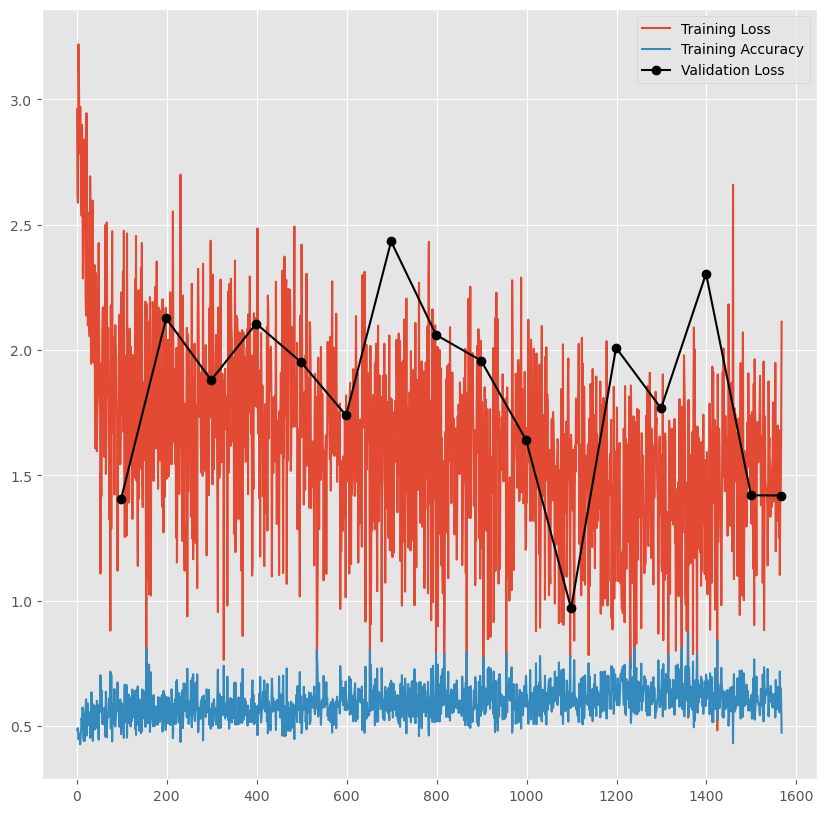

In [509]:
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')


def splitSerToArr(ser):
    return [ser.index, ser.values]
    

data = pd.read_csv('fine_tune_results_finance_model1.csv', delimiter=',')
xs = range(len(data))
step = data['step']
train_loss = data['train_loss']
valid_loss = data['valid_loss']
train_acc = data['train_accuracy']
s1 = pd.Series(valid_loss, index=xs)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(step, train_loss, label='Training Loss')
ax.plot(step, train_acc, label='Training Accuracy')
ax.plot( *splitSerToArr(s1.dropna()), linestyle='-', marker='o', label='Validation Loss', color = 'black')
plt.legend()


**The training loss fell over the course of the fine-tuning and the accuracy gradually increased. The validation loss was volatile after an initial test at step 100 but ended at the same value at the end of training. To see if fine-tuning made a difference, I will input some questions and compare the responses from the base 4o-mini model and the fine-tuned version.**

In [515]:

completion = client.chat.completions.create(
  model="gpt-4o-mini-2024-07-18",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Should I invest in cryptocurrency"}
  ]
)

print(completion.choices[0].message.content)

Investing in cryptocurrency can be a complex decision and depends on various factors including your financial situation, investment goals, risk tolerance, and understanding of the market. Here are some considerations to help you decide:

1. **Understanding Volatility**: Cryptocurrencies are known for their extreme price volatility. Prices can fluctuate widely in short periods, which can lead to significant gains but also substantial losses.

2. **Research**: Make sure to understand the cryptocurrency market, including the different types of cryptocurrencies, their use cases, and the technology behind them (like blockchain). Knowledge about the market can help in making informed decisions.

3. **Risk Tolerance**: Assess your willingness and ability to take risks. If you are uncomfortable with the idea of potentially losing a significant part of your investment, cryptocurrencies might not be suitable for you.

4. **Diversification**: Consider how cryptocurrency fits into your overall inv

In [517]:
completion = client.chat.completions.create(
  model="ft:gpt-4o-mini-2024-07-18:personal:finance:Az8PLsfl",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Should I invest in cryptocurrency"}
  ]
)

print(completion.choices[0].message.content)

Cryptocurrency and blockchain technology have the potential to revolutionize the way we store and transfer value around the world. Investing in cryptocurrencies can be a great way to get exposure to this technology, but like any investment, it should be done with caution. Do your research and make sure you understand the technology before investing.


**The response from the fine-tuned model is much different than the base and is appropriate for the chatbot. It is pithy with the necessary investing risk disclaimer. I will try another.**

In [520]:
completion = client.chat.completions.create(
  model="gpt-4o-mini-2024-07-18",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What are some good AI stock investments?"}
  ]
)

print(completion.choices[0].message.content)

When considering investments in AI-related stocks, it's essential to conduct thorough research and consider the broader trends in the technology sector, as well as the unique strengths and growth potential of individual companies. As of my last knowledge update in October 2023, here are some notable AI-related companies that investors often consider:

1. **NVIDIA Corporation (NVDA)**: A leader in graphics processing units (GPUs), NVIDIA has become central to AI, powering many machine learning applications and deep learning frameworks.

2. **Alphabet Inc. (GOOGL)**: The parent company of Google, Alphabet is heavily invested in AI research and applications, from AI in search to self-driving cars via Waymo.

3. **Microsoft Corporation (MSFT)**: Microsoft has integrated AI broadly across its products, including Azure cloud services, Office products, and more. They have also invested significantly in AI startups.

4. **Amazon.com Inc. (AMZN)**: Through Amazon Web Services (AWS), Amazon is a

In [554]:
completion = client.chat.completions.create(
  model="ft:gpt-4o-mini-2024-07-18:personal:finance:Az8PLsfl",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What are some good AI stock investments?"}
  ]
)

print(completion.choices[0].message.content)

Don't buy AI stocks. Invest to the whole index (i.e. ETF which tracks S&P 500 or even better world index). Some stocks (like AI) is overvalued right now and correction is coming so if you by some particular stock it might go down in the short term. Invest in whole index and you should get average market return (few percent every year). These few percent slowly compounded will be well worth for you in the long run (20 years), when you will retire.


**The response from the fine-tuned model advises buying a whole market ETF vs. individual stocks or AI stocks. AI's positive impact on GDP would be reflected in many stocks in the S&P 500 or other diversified index fund. Again, the output format is short and risk-adverse. I like the disclaimer in the last sentence of the response from the base model, but that could be a blanket disclaimer on the app.**

**Now I will try one of the questions with long philosophical responses that I filtered from the original dataset. I think "What happens to people without any retirement savings?" is scary.**

In [556]:
completion = client.chat.completions.create(
  model="gpt-4o-mini-2024-07-18",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What happens to people without any retirement savings?"}
  ]
)

print(completion.choices[0].message.content)

People without any retirement savings can face a variety of challenges as they approach retirement age. Here are some potential consequences and scenarios:

1. **Financial Hardship**: Without savings, individuals may have to rely solely on Social Security benefits, which often provide only a modest income. This can lead to financial difficulties in maintaining a standard of living.

2. **Delayed Retirement**: Many individuals may need to work longer than they had planned, staying in the workforce to ensure they have enough income to cover their living expenses during retirement.

3. **Increased Dependence on Others**: People without savings may become dependent on family members, friends, or government assistance programs to meet their basic needs.

4. **Living Below the Poverty Line**: Without significant savings or income, some retirees may struggle to afford essentials such as housing, food, healthcare, and transportation, leading to a decreased quality of life.

5. **Health Issues*

In [563]:
completion = client.chat.completions.create(
  model="ft:gpt-4o-mini-2024-07-18:personal:finance:Az8PLsfl",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What happens to people without any retirement savings?"}
  ]
)

print(completion.choices[0].message.content)

Even if there are no savings available government provides support to senior citizens in some way or the other. There are various schemes in place which take care of day to day expenses of the senior citizens.


**Short and reassuring. The response from the base model is depressing and we do not want that from our fun chatbot.**

**I have run out of time for human evaluation of the fine-tuned model because the data wrangling was dreadful and prolonged. They used the word cleaned loosely when naming the dataset. Based on the response to the three inquiries, the model has clearly been fine-tuned and I consider it a success for the goals of the project.**